# What is tokenization?
- Turning a string or document into tokens (smaller chunks)
- One step in preparing a text for NLP
<br>Some examples:
- Tokenize a document into sentences: **sent_tokenize**
- Tokenize a sentence into words and punctuations: **word_tokenize**
- Separating punctuation
- tokenize a string or document based on a regular expression pattern: **regexp_tokenize**
- Separating all hashtags in a tweet, mentions and lots of exclamation points!!!: **TweetTokenizer**


In [219]:
# How to install NLTK: https://www.nltk.org/install.html
# nltk.download('punkt')

In [220]:
# https://www.nltk.org/api/nltk.tokenize.html
# https://www.nltk.org/api/nltk.tokenize.casual.html
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize, TweetTokenizer

import numpy as np
import matplotlib.pyplot as plt

from collections import Counter

# Why tokenize?
- Easier to map part of speech
- Matching common words
- Removing unwanted tokens



In [221]:
imdb_storyline = "This is the tale of Harry Potter (Daniel Radcliffe), an ordinary eleven-year-old boy serving as a sort of slave for his aunt and uncle who learns that he is actually a wizard and has been invited to attend the Hogwarts School for Witchcraft and Wizardry. Harry is snatched away from his mundane existence by Rubeus Hagrid (Robbie Coltrane), the groundskeeper for Hogwarts, and quickly thrown into a world completely foreign to both him and the viewer. Famous for an incident that happened at his birth, Harry makes friends easily at his new school. He soon finds, however, that the wizarding world is far more dangerous for him than he would have imagined, and he quickly learns that not all wizards are ones to be trusted."

# source: https://www.imdb.com/title/tt0241527/

In [222]:
# Split imdb_storyline into sentences: sentences
sentence_tokens = sent_tokenize(imdb_storyline)
print(sentence_tokens)
print("length of the storyline = ", len(sentence_tokens))

['This is the tale of Harry Potter (Daniel Radcliffe), an ordinary eleven-year-old boy serving as a sort of slave for his aunt and uncle who learns that he is actually a wizard and has been invited to attend the Hogwarts School for Witchcraft and Wizardry.', 'Harry is snatched away from his mundane existence by Rubeus Hagrid (Robbie Coltrane), the groundskeeper for Hogwarts, and quickly thrown into a world completely foreign to both him and the viewer.', 'Famous for an incident that happened at his birth, Harry makes friends easily at his new school.', 'He soon finds, however, that the wizarding world is far more dangerous for him than he would have imagined, and he quickly learns that not all wizards are ones to be trusted.']
length of the storyline =  4


In [223]:
print("sentence 1: ", sentence_tokens[0])
print("sentence 2: ", sentence_tokens[1])
print("sentence 3: ", sentence_tokens[2])
print("sentence 4: ", sentence_tokens[3])

sentence 1:  This is the tale of Harry Potter (Daniel Radcliffe), an ordinary eleven-year-old boy serving as a sort of slave for his aunt and uncle who learns that he is actually a wizard and has been invited to attend the Hogwarts School for Witchcraft and Wizardry.
sentence 2:  Harry is snatched away from his mundane existence by Rubeus Hagrid (Robbie Coltrane), the groundskeeper for Hogwarts, and quickly thrown into a world completely foreign to both him and the viewer.
sentence 3:  Famous for an incident that happened at his birth, Harry makes friends easily at his new school.
sentence 4:  He soon finds, however, that the wizarding world is far more dangerous for him than he would have imagined, and he quickly learns that not all wizards are ones to be trusted.


In [224]:
# Use word_tokenize to tokenize a sentence
word_tokens = word_tokenize(sentence_tokens[3])
print(word_tokens)
print("no of tokens = ", len(word_tokens))

['He', 'soon', 'finds', ',', 'however', ',', 'that', 'the', 'wizarding', 'world', 'is', 'far', 'more', 'dangerous', 'for', 'him', 'than', 'he', 'would', 'have', 'imagined', ',', 'and', 'he', 'quickly', 'learns', 'that', 'not', 'all', 'wizards', 'are', 'ones', 'to', 'be', 'trusted', '.']
no of tokens =  36


In [225]:
# Make a set of unique tokens in a sentence
unique_tokens = set(word_tokenize(sentence_tokens[3]))

# Print the unique tokens result
print(unique_tokens)
print("no of unique tokens = ", len(unique_tokens))

{'world', 'he', 'wizarding', 'dangerous', '.', 'ones', 'have', 'quickly', 'is', 'soon', 'would', 'far', 'be', 'learns', 'however', 'and', 'finds', 'wizards', 'than', 'are', 'for', 'more', 'imagined', 'all', 'to', 'that', 'the', 'He', ',', 'not', 'him', 'trusted'}
no of unique tokens =  32


In [226]:
# How to find the duplicate values in a list?
duplicate_tokens = set([x for x in word_tokens if word_tokens.count(x) >= 2])
print(duplicate_tokens)

{',', 'he', 'that'}


In [227]:
# Use regexp_tokenize to tokenize a sentence
words = regexp_tokenize(sentence_tokens[3], r"\w+")
print(words)
print(len(words))

['He', 'soon', 'finds', 'however', 'that', 'the', 'wizarding', 'world', 'is', 'far', 'more', 'dangerous', 'for', 'him', 'than', 'he', 'would', 'have', 'imagined', 'and', 'he', 'quickly', 'learns', 'that', 'not', 'all', 'wizards', 'are', 'ones', 'to', 'be', 'trusted']
32


In [228]:
# Use regexp_tokenize to tokenize a sentence
# include comma and period
words_ = regexp_tokenize(sentence_tokens[3], r"\w+|\,|\.")
print(words_)
print(len(words_))

['He', 'soon', 'finds', ',', 'however', ',', 'that', 'the', 'wizarding', 'world', 'is', 'far', 'more', 'dangerous', 'for', 'him', 'than', 'he', 'would', 'have', 'imagined', ',', 'and', 'he', 'quickly', 'learns', 'that', 'not', 'all', 'wizards', 'are', 'ones', 'to', 'be', 'trusted', '.']
36


In [229]:
tweet = "It's a game of patience, consistent learning, and regular practice. I have been learning from @DataCamp since 2018. I believe that Daily 1-hour practice brings exponential growth. #python #datascience #machinelearning #sql #dataanalysis #tableau #powerbi #statistics"

mentions_hashtags = regexp_tokenize(tweet, r"([@#]\w+)")
print(mentions_hashtags)

['@DataCamp', '#python', '#datascience', '#machinelearning', '#sql', '#dataanalysis', '#tableau', '#powerbi', '#statistics']


In [230]:
tokenizer = TweetTokenizer()
tweet_tokens = tokenizer.tokenize(tweet)
print(tweet_tokens)

["It's", 'a', 'game', 'of', 'patience', ',', 'consistent', 'learning', ',', 'and', 'regular', 'practice', '.', 'I', 'have', 'been', 'learning', 'from', '@DataCamp', 'since', '2018', '.', 'I', 'believe', 'that', 'Daily', '1', '-', 'hour', 'practice', 'brings', 'exponential', 'growth', '.', '#python', '#datascience', '#machinelearning', '#sql', '#dataanalysis', '#tableau', '#powerbi', '#statistics']


In [231]:
tweet_word_tokens = word_tokenize(tweet)
print(tweet_word_tokens)

['It', "'s", 'a', 'game', 'of', 'patience', ',', 'consistent', 'learning', ',', 'and', 'regular', 'practice', '.', 'I', 'have', 'been', 'learning', 'from', '@', 'DataCamp', 'since', '2018', '.', 'I', 'believe', 'that', 'Daily', '1-hour', 'practice', 'brings', 'exponential', 'growth', '.', '#', 'python', '#', 'datascience', '#', 'machinelearning', '#', 'sql', '#', 'dataanalysis', '#', 'tableau', '#', 'powerbi', '#', 'statistics']


[2, 2, 1, 4, 2, 8, 1, 10, 8, 1, 3, 7, 8, 1, 1, 4, 4, 8, 4, 1, 8, 5, 4, 1, 1, 7, 4, 5, 6, 8, 6, 11, 6, 1, 1, 6, 1, 11, 1, 15, 1, 3, 1, 12, 1, 7, 1, 7, 1, 10]


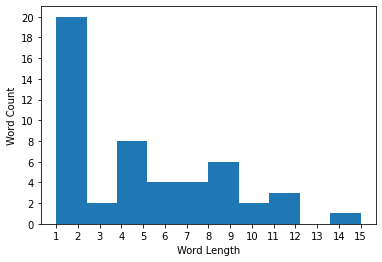

In [232]:
word_lengths = [len(w) for w in tweet_word_tokens]
print(word_lengths)
plt.hist(word_lengths)
plt.xlabel("Word Length")
plt.ylabel("Word Count")
plt.xticks(np.arange(1,16,1))
plt.yticks(np.arange(0,22,2))
plt.show()

In [239]:
count = Counter(word_tokenize(imdb_storyline))
print(count)

Counter({',': 7, 'and': 6, 'the': 5, 'for': 5, 'is': 4, 'his': 4, 'that': 4, '.': 4, 'Harry': 3, 'a': 3, 'he': 3, 'to': 3, 'of': 2, '(': 2, ')': 2, 'an': 2, 'learns': 2, 'Hogwarts': 2, 'quickly': 2, 'world': 2, 'him': 2, 'at': 2, 'This': 1, 'tale': 1, 'Potter': 1, 'Daniel': 1, 'Radcliffe': 1, 'ordinary': 1, 'eleven-year-old': 1, 'boy': 1, 'serving': 1, 'as': 1, 'sort': 1, 'slave': 1, 'aunt': 1, 'uncle': 1, 'who': 1, 'actually': 1, 'wizard': 1, 'has': 1, 'been': 1, 'invited': 1, 'attend': 1, 'School': 1, 'Witchcraft': 1, 'Wizardry': 1, 'snatched': 1, 'away': 1, 'from': 1, 'mundane': 1, 'existence': 1, 'by': 1, 'Rubeus': 1, 'Hagrid': 1, 'Robbie': 1, 'Coltrane': 1, 'groundskeeper': 1, 'thrown': 1, 'into': 1, 'completely': 1, 'foreign': 1, 'both': 1, 'viewer': 1, 'Famous': 1, 'incident': 1, 'happened': 1, 'birth': 1, 'makes': 1, 'friends': 1, 'easily': 1, 'new': 1, 'school': 1, 'He': 1, 'soon': 1, 'finds': 1, 'however': 1, 'wizarding': 1, 'far': 1, 'more': 1, 'dangerous': 1, 'than': 1, 'wo

In [240]:
count.most_common(5)

[(',', 7), ('and', 6), ('the', 5), ('for', 5), ('is', 4)]